In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [202]:
test_data = pd.read_csv('test.csv')

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
train_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head(5)

,id,class
0,3116945,e
1,3116946,e
2,3116947,e
3,3116948,e
4,3116949,e


In [6]:
train_data.shape

(3116945, 22)

In [7]:
test_data.head(5)

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [8]:
train_data.isnull().sum()

id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [9]:
train_data['stem-root'].isnull().value_counts()

True     2757023
False     359922
Name: stem-root, dtype: int64

In [10]:
columns_to_drop = ['cap-surface','gill-attachment', 'gill-spacing', 'stem-root','stem-surface','veil-type','veil-color' , 'spore-print-color']
df1 = train_data.drop(columns_to_drop, axis=1)

In [11]:
df1.head(5)

,id,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,0,e,8.80,f,u,f,w,4.51,15.39,w,f,f,d,a
1,1,p,4.51,x,o,f,n,4.79,6.48,o,t,z,d,w
2,2,e,6.94,f,b,f,w,6.85,9.93,n,f,f,l,w
3,3,e,3.88,f,g,f,g,4.16,6.53,w,f,f,d,u
4,4,e,5.85,x,w,f,w,3.37,8.36,w,f,f,g,a


In [12]:
df2 = df1.dropna()

In [13]:
df2.shape

(2987867, 14)

In [14]:
df1.shape

(3116945, 14)

In [15]:
df2.isna().any()

id                      False
class                   False
cap-diameter            False
cap-shape               False
cap-color               False
does-bruise-or-bleed    False
gill-color              False
stem-height             False
stem-width              False
stem-color              False
has-ring                False
ring-type               False
habitat                 False
season                  False
dtype: bool

In [16]:
x = df2.iloc[:,2:]
y = df2.iloc[:,1:2]

In [17]:
y

,class
0,e
1,p
2,e
3,e
4,e
...,...
3116940,e
3116941,e
3116942,p
3116943,e


In [18]:
label_encoder = preprocessing.LabelEncoder()
cols = ['cap-shape','cap-color','does-bruise-or-bleed','gill-color','stem-color','has-ring','ring-type',
       'habitat','season']
for col in cols:
    x[col] = label_encoder.fit_transform(x[col].astype(str))   

In [19]:
x.head()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,8.80,52,71,8,58,4.51,15.39,55,5,18,25,0
1,4.51,69,63,8,45,4.79,6.48,47,17,39,25,3
2,6.94,52,48,8,58,6.85,9.93,46,5,18,36,3
3,3.88,52,56,8,36,4.16,6.53,55,5,18,25,2
4,5.85,69,73,8,58,3.37,8.36,55,5,18,29,0


In [20]:
y = y['class'].replace({'p':0, 'e':1})

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 16)

In [22]:
x_train

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
764172,1.55,69,75,8,58,5.99,2.32,57,5,18,30,0
754648,4.42,52,75,8,45,6.20,5.07,46,5,18,36,0
1508174,6.13,47,56,8,36,5.89,3.98,46,5,18,25,0
1559203,4.65,52,75,8,60,6.44,5.49,46,5,18,29,2
2133986,3.29,47,73,8,58,4.34,2.82,57,5,18,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3047138,10.22,69,62,8,58,8.44,10.07,46,5,18,25,0
103128,6.84,69,73,8,47,3.27,8.70,55,5,18,29,2
103071,1.52,49,62,8,36,4.88,1.37,38,5,18,36,2
2169927,2.58,47,62,8,42,6.54,2.78,55,5,18,25,3


In [30]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [23]:
 classification = LogisticRegression()
classification.fit(X_train_scaled,y_train)

LogisticRegression()

In [44]:
y_pred = classification.predict(x_test_scaled)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [45]:
from sklearn import metrics


In [46]:
condusion_matrix = metrics.confusion_matrix(y_test,y_pred)

In [47]:
condusion_matrix

array([[312825, 101002],
       [186217, 146923]])

In [48]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [49]:
accuracy

0.6154863601738765

In [112]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = {
    'penalty': [ 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [200, 500, 750, 1000]
}

clf = GridSearchCV(classification, param_grid=grid_search, cv=2, verbose=True, n_jobs=-1)

batch_size = 100000
# Training in batches of 1000
for start in range(0, len(X_train_scaled), batch_size):
    end = start + batch_size
    x_batch = X_train_scaled[start:end]
    y_batch = y_train[start:end]
    clf.fit(x_batch, y_batch)



In [ ]:
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

In [25]:
from sklearn import svm
svm_clf = svm.SVC()
# svm_clf.fit(X_train_scaled, y_train)

In [30]:
x_few = X_train_scaled[:100000]
y_few = y_train[:100000]

In [31]:
from sklearn import svm
import time
# Start timer
start_time = time.time()
svm_clf.fit(x_few, y_few)
end_time = time.time()

tot_time = end_time - start_time
tot_time

102.22108316421509

In [ ]:
y_pred = svm_clf.predict(x_test)

/Users/jagadeeshgurram/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)

In [ ]:
acc

In [27]:
import time
from sklearn import svm
start_time = time.time()
batch_size = 100000
svm_full_clf = svm.SVC()
for start in range(0, len(X_train_scaled), batch_size):
    end = start + batch_size
    x_batch = X_train_scaled[start:end]
    y_batch = y_train[start:end]
    svm_full_clf.fit(x_batch, y_batch)
end_time = time.time()

tot_time = end_time - start_time

In [28]:
tot_time

2276.0659141540527

In [32]:
y_pred = svm_full_clf.predict(x_test_scaled)

In [35]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [36]:
accuracy

0.9034294687717128

In [38]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [39]:
confusion_matrix

array([[374802,  39025],
       [ 33110, 300030]])

In [40]:
True_positive = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])

In [41]:
True_positive

0.9056973082954954

In [43]:
True_negative = confusion_matrix[0][1]/(confusion_matrix[0][0] + confusion_matrix[0][1])
True_negative

0.09430269170450455

In [51]:
False_Negative = confusion_matrix[1][0]/ (confusion_matrix[1][0] + confusion_matrix[0][1])
False_Negative

0.45900048520135855

In [54]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

In [55]:
auc_curve = metrics.auc(fpr, tpr)

In [56]:
auc_curve

0.5984783104826399

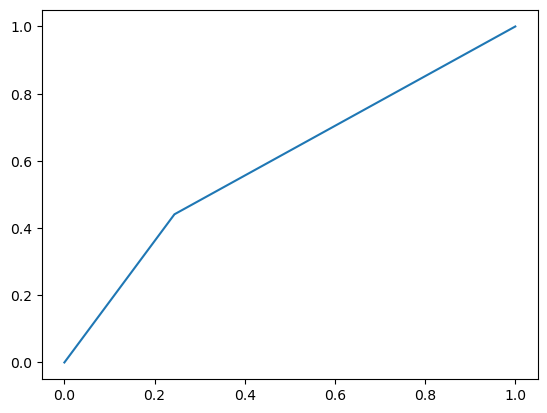

In [59]:
plt.plot(fpr, tpr , auc_curve)

In [77]:
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [83]:
# Hyper-Parameter Tuning

import time
from sklearn import svm
start_time = time.time()
batch_size = 100000
svm_full_clf = svm.SVC(C=2, kernel = 'poly',degree = 1, class_weight = 'balanced' )
for start in range(0, len(X_train_scaled), batch_size):
    end = start + batch_size
    x_batch = X_train_scaled[start:end]
    y_batch = y_train[start:end]
    svm_full_clf.fit(x_batch, y_batch)
end_time = time.time()

tot_time = end_time - start_time

In [87]:
y_pred = svm_full_clf.predict(x_test_scaled)

In [88]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.6320707608234366

In [89]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[268234, 145593],
       [129238, 203902]])

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state = 42)

In [96]:
start_time = time.time()
batch_size = 100000
for start in range(0, len(X_train_scaled), batch_size):
    end = start + batch_size
    x_batch = X_train_scaled[start:end]
    y_batch = y_train[start:end]
    tree_clf.fit(x_batch, y_batch)
end_time = time.time()

tot_time = end_time - start_time
tot_time

15.428508043289185

In [98]:
y_pred_tree = tree_clf.predict(x_test_scaled)

In [99]:
tree_accuracy = metrics.accuracy_score(y_test,y_pred_tree)
tree_accuracy


0.9520554455551584

In [100]:
confusion_matrix_tree = metrics.confusion_matrix(y_test, y_pred_tree)
confusion_matrix_tree

array([[395722,  18105],
       [ 17708, 315432]])

In [105]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier()

In [106]:
start_time = time.time()
batch_size = 100000
for start in range(0, len(X_train_scaled), batch_size):
    end = start + batch_size
    x_batch = X_train_scaled[start:end]
    y_batch = y_train[start:end]
    RF_clf.fit(x_batch, y_batch)
end_time = time.time()

tot_time = end_time - start_time
tot_time

273.9689872264862

In [107]:
Y_pred_RF = RF_clf.predict(x_test_scaled)

In [108]:
accuracy_RF = metrics.accuracy_score(y_test, Y_pred_RF)
accuracy_RF

0.976980241429675

In [110]:
confusion_matrix_RF = metrics.confusion_matrix(y_test, Y_pred_RF)
confusion_matrix_RF

array([[404974,   8853],
       [  8342, 324798]])

In [118]:

#Hyper-parameter tuning
param_grid = {
    'n_estimators': [200,300,500]
}

RF_pg = GridSearchCV(RF_clf, param_grid,scoring="accuracy",cv=2, verbose=1, n_jobs=-1)
start_time = time.time()
batch_size = 100000
for start in range(0, len(X_train_scaled), batch_size):
    end = start + batch_size
    x_batch = X_train_scaled[start:end]
    y_batch = y_train[start:end]
    RF_pg.fit(x_batch, y_batch)
end_time = time.time()

tot_time = end_time - start_time
tot_time


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fits
Fitting 2 folds for each of 3 candidates, totalling 6 fi

1964.578856229782

In [121]:
best_params = RF_pg.best_params_
best_params

{'n_estimators': 300}

In [122]:
RF_clf_best_params = RandomForestClassifier(**best_params)
start_time = time.time()
batch_size = 100000
for start in range(0, len(X_train_scaled), batch_size):
    end = start + batch_size
    x_batch = X_train_scaled[start:end]
    y_batch = y_train[start:end]
    RF_clf_best_params.fit(x_batch, y_batch)
end_time = time.time()


In [126]:
y_pred_RF_pg = RF_clf_best_params.predict(x_test_scaled)

In [127]:
accuracy_RF_pg_best_params = metrics.accuracy_score(y_test, y_pred_RF_pg)
accuracy_RF_pg_best_params

0.9774019468062177

In [131]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(label_encoder = False)
start_time = time.time()
batch_size = 100000
for start in range(0, len(X_train_scaled), batch_size):
    end = start + batch_size
    x_batch = X_train_scaled[start:end]
    y_batch = y_train[start:end]
    xgb_clf.fit(x_batch, y_batch)
end_time = time.time()



/Users/jagadeeshgurram/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:35:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jagadeeshgurram/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:35:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jagadeeshgurram/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:35:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/jagadeeshgurram/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:35:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "label_encoder" } are not used.

  warnings.warn(sms

In [132]:
y_pred_xgb = xgb_clf.predict(x_test_scaled)

In [133]:
accuracy_xgboost = metrics.accuracy_score(y_test, y_pred_xgb)
accuracy_xgboost

0.8653836113241951

In [134]:
end_time

1725064544.885878

In [139]:
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=5, n_iter=150, 
    scoring='accuracy', n_jobs=-1, verbose=1
)

In [142]:
xgb_clf.fit(X_train_scaled, y_train)

/Users/jagadeeshgurram/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:41:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [143]:
y_pred_xgb_clf = xgb_clf.predict(x_test_scaled)
accuarcy_y_pred_xgb_clf = metrics.accuracy_score(y_test, y_pred_xgb_clf)
accuarcy_y_pred_xgb_clf

0.9171837577831417

### So from all the models that I tried, Random Forest Classification had the highest accuracy with 300 as ```n_estimators```.


In [147]:
confusion_matrix_rf = metrics.confusion_matrix(y_test, Y_pred_RF,labels=RF_clf_best_params.classes_)
confusion_matrix_rf

array([[404974,   8853],
       [  8342, 324798]])

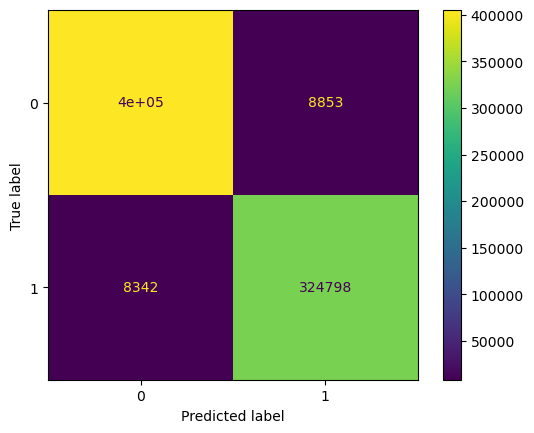

In [152]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix_rf, display_labels=RF_clf_best_params.classes_)
disp.plot()

In [153]:
accuracy_RF = metrics.accuracy_score(y_test, Y_pred_RF )
accuracy_RF

0.976980241429675

In [159]:
recall_RF = metrics.recall_score(y_test, Y_pred_RF)
precision_RF = metrics.precision_score(y_test, Y_pred_RF)
f1score_RF = metrics.f1_score(y_test, Y_pred_RF)


print(f"Recall: {recall_RF}, Precision: {precision_RF}, F1score: {f1score_RF}")

Recall: 0.9749594764963679, Precision: 0.9734662866288427, F1score: 0.9742123094042962


### Predicting on the test dataset

In [160]:
test_data.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,...,b,NaN,w,u,w,t,g,NaN,d,a
1,3116946,6.90,o,t,o,f,NaN,c,y,1.27,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,3116947,2.00,b,g,n,f,NaN,c,n,6.18,...,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,3116949,6.17,x,h,y,f,p,NaN,y,6.73,...,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [203]:
columns_to_drop = ['cap-surface','gill-attachment', 'gill-spacing', 'stem-root','stem-surface','veil-type','veil-color' , 'spore-print-color']
test_data = test_data.drop(columns_to_drop, axis=1)

In [204]:
test_data1 = test_data.iloc[:,1:]

In [205]:
label_encoder = preprocessing.LabelEncoder()
cols = ['cap-shape','cap-color','does-bruise-or-bleed','gill-color','stem-color','has-ring','ring-type',
       'habitat','season']
for col in cols:
    test_data1[col] = label_encoder.fit_transform(test_data1[col].astype(str)) 
test_data_scaled_ = scaler.fit_transform(test_data1)

In [208]:
test_data_scaled_

array([[ 0.49809562,  0.88022403, -0.24914929, ..., -0.16427196,
        -0.51922314, -0.95374086],
       [ 0.12673411, -0.06199762,  0.0474404 , ..., -0.3661035 ,
        -0.51922314, -0.95374086],
       [-0.91905406, -1.63236702, -0.24914929, ..., -0.3661035 ,
        -0.51922314, -0.04841776],
       ...,
       [-0.1229745 ,  0.88022403, -1.73209771, ...,  4.07419035,
        -0.51922314, -0.95374086],
       [-0.27237281, -1.63236702, -0.24914929, ..., -0.3661035 ,
        -0.51922314, -0.95374086],
       [ 1.96433332, -1.10891055,  1.23379914, ..., -0.3661035 ,
        -0.51922314,  1.76222843]])

In [207]:
test_data_scaled_.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [209]:
y_pred_xgb_clf = xgb_clf.predict(test_data_scaled_)

In [210]:
y_pred_xgb_clf

array([1, 0, 0, ..., 1, 0, 1])

In [211]:
labels = list(y_pred_xgb_clf)

In [212]:
labels

[1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,


In [224]:
label = pd.DataFrame({'class':labels})

In [225]:
label = label.replace({0:'p', 1:'e'})

In [226]:
final_dataset = pd.concat([test_data.iloc[:,0], label], axis=1).reset_index(drop=True)


In [227]:
final_dataset

,id,class
0,3116945,e
1,3116946,p
2,3116947,p
3,3116948,e
4,3116949,p
...,...,...
2077959,5194904,p
2077960,5194905,p
2077961,5194906,e
2077962,5194907,p


In [228]:
final_dataset.to_csv('Final_dataset2.csv', index=False)